# SVHN Classifier Use 11 Layers network

This notebook do the following things:
* Read data grom .mat files saved in the data preprcesss
* train the network and save the best model
* load the best model and run on the test set

In [2]:
import tensorflow as tf
import numpy as np
import scipy.io as scio
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [2]:
num_training = 30060
num_validation = 3340

### 1 Read data and data process

#### (1.1) Read the preprocessed data from .mat file

In [3]:
X_train_mat = './Xtrain.mat'
Y_train_mat = './Ytrain.mat'
x_train_m = scio.loadmat(X_train_mat)
y_train_m = scio.loadmat(Y_train_mat)

In [4]:
x_train = x_train_m['Xtrain']
y_train = y_train_m['Ytrain']

In [5]:
print('data type of training set: {}'.format(type(x_train)))
print('shape of training set read from mat file: {}'.format(x_train.shape))
print('data type of training set value: {}'.format(type(y_train)))
print('shape of training set value read from mat file: {}'.format(y_train.shape))

data type of training set: <class 'numpy.ndarray'>
shape of training set read from mat file: (33401, 54, 54, 3)
data type of training set value: <class 'numpy.ndarray'>
shape of training set value read from mat file: (33401,)


#### (1.2) get label_length, a 33401x7 np array from y_train

In [6]:
label_length = np.zeros((y_train.shape[0], 7), dtype=int)
for i in range(label_length.shape[0]):
    label_num = int(y_train[i])
    len_label = len(str(label_num))
    if len_label > 5:
        label_length[i][6] = 1
    else:
        label_length[i][len_label] = 1

In [7]:
print('data type of label_length: {}'.format(type(label_length)))
print('shape of label_length: {}'.format(label_length.shape))
print('Show an example of label_length:')
print('the label of the first image is: {}'.format(y_train[0]))
print('the length of that in label_length is: {}'.format(label_length[0]))
print('the label of the 29404th image is: {}'.format(y_train[29403]))
print('the length of that in label_length is: {}'.format(label_length[29403]))

data type of label_length: <class 'numpy.ndarray'>
shape of label_length: (33401, 7)
Show an example of label_length:
the label of the first image is: 19    
the length of that in label_length is: [0 0 1 0 0 0 0]
the label of the 29404th image is: 202   
the length of that in label_length is: [0 0 0 1 0 0 0]


#### (1.3) get digits_labels, a 33401x5x11 np array from y_train

In [8]:
digits_labels = np.zeros((y_train.shape[0], 5, 11), dtype=int)
for i in range(digits_labels.shape[0]):
    label_num = str(int(y_train[i]))
    label_num_len = len(label_num)
    if label_num_len <= 5:
        for j in range(label_num_len):
            digits_labels[i][j][int(label_num[j])] = 1
        for l in range(label_num_len, 5):
            digits_labels[i][l][10] = 1
    else:
        for j in range(5):
            digits_labels[i][j][int(label_num[j])] = 1

In [9]:
print('data type of digits_labels: {}'.format(type(digits_labels)))
print('shape of digits_labels: {}'.format(digits_labels.shape))
print('Show an example of digits_labels:')
print('the label of the first image is: {}'.format(y_train[0]))
print('the length of that in digits_labels is: \n{}'.format(digits_labels[0]))
print('the label of the 29404th image is: {}'.format(y_train[29403]))
print('the length of that in digits_labels is: \n{}'.format(digits_labels[29403]))

data type of digits_labels: <class 'numpy.ndarray'>
shape of digits_labels: (33401, 5, 11)
Show an example of digits_labels:
the label of the first image is: 19    
the length of that in digits_labels is: 
[[0 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 0 0 0 0 1]]
the label of the 29404th image is: 202   
the length of that in digits_labels is: 
[[0 0 1 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 0 0 0 0 1]]


#### (1.4) Split training set into training set and vaildation set

In [10]:
x_val = x_train[num_training :num_training+num_validation, :]
val_label = digits_labels[num_training :num_training+num_validation, :, :]
val_label_length = label_length[num_training :num_training+num_validation, :]
y_val = y_train[num_training :num_training+num_validation]

x_train = x_train[0:num_training, :]
train_label = digits_labels[0:num_training, :, :]
train_label_length = label_length[0:num_training, :]
y_train = y_train[0:num_training]

#### (1.5) Show the result of data process

The shape of training set: (30060, 54, 54, 3) and the shape of validation set: (3340, 54, 54, 3)
The shape of label of training set: (30060, 5, 11) and the shape of label of validation set: (3340, 5, 11)
The shape of label length of training set: (30060, 7) and the shape of label length of validation set: (3340, 7)
one image from training set:
the label of that image is: 416   
the label showed in matrix is: 
[[0 0 0 0 1 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 0 0 0 0 1]]
the label length showed in matrix is: 
[0 0 0 1 0 0 0]


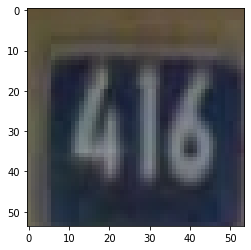

In [11]:
print('The shape of training set: {} and the shape of validation set: {}'.format(x_train.shape, x_val.shape))
print('The shape of label of training set: {} and the shape of label of validation set: {}'.format(train_label.shape, val_label.shape))
print('The shape of label length of training set: {} and the shape of label length of validation set: {}'.format(train_label_length.shape, val_label_length.shape))
print('one image from training set:')
num = 30059
plt.imshow(x_train[num])
print('the label of that image is: {}'.format(y_train[num]))
print('the label showed in matrix is: \n{}'.format(train_label[num]))
print('the label length showed in matrix is: \n{}'.format(train_label_length[num]))

one image from validation set:
the label of that image is: 223   
the label showed in matrix is: 
[[0 0 1 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 0 0 0 0 1]]
the label length showed in matrix is: 
[0 0 0 1 0 0 0]


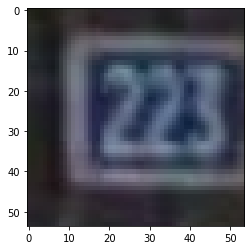

In [12]:
print('one image from validation set:')
num = 0
plt.imshow(x_val[num])
print('the label of that image is: {}'.format(y_val[num]))
print('the label showed in matrix is: \n{}'.format(val_label[num]))
print('the label length showed in matrix is: \n{}'.format(val_label_length[num]))

### 2 Train the model

In this file, eleven layers of neural networks are used. The structure of the neural network is shown below
* The input of the network with is an image with shape 54x54x3 
* the outputs are 6 vectors (one with shape 1x7 which is the length of the output number and five with the shape 1x11 which are the number of each digits)
![img](img/network_structure.png)

In [13]:
from utils.models.model11 import training
training(x_train, train_label, train_label_length,
             x_val, val_label, val_label_length,
             learning_rate=1e-4,
             batch_size=20,
             drop_rate=0.2,
             epoch=15)

Instructions for updating:
Use keras.layers.conv2d instead.
Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use keras.layers.batch_normalization instead.
Instructions for updating:
Use keras.layers.max_pooling2d instead.
Instructions for updating:
Use keras.layers.dropout instead.
(?, 4, 4, 192)
Instructions for updating:
Use keras.layers.dense instead.
Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.

number of batches for training: 1503
epoch 1 
=====is training=======
=====is training=======
=====is training=======
=====is training=======
=====is training=======
=====is training=======
=====is training=======
=====is training=======
=====is training=======
=====is training=======
Best validation accuracy! iteration:500 accuracy: 5.0%
=====is training=======
=====is training=======
=====is train

=====is training=======
=====is training=======
=====is training=======
=====is training=======
epoch 9 
=====is training=======
=====is training=======
=====is training=======
=====is training=======
=====is training=======
=====is training=======
=====is training=======
=====is training=======
=====is training=======
=====is training=======
=====is training=======
=====is training=======
=====is training=======
=====is training=======
=====is training=======
=====is training=======
=====is training=======
=====is training=======
=====is training=======
=====is training=======
Best validation accuracy! iteration:13000 accuracy: 80.0%
=====is training=======
=====is training=======
=====is training=======
=====is training=======
=====is training=======
=====is training=======
=====is training=======
=====is training=======
=====is training=======
=====is training=======
epoch 10 
=====is training=======
=====is training=======
=====is training=======
=====is training=======
=====is tra

### 3 Get test data set from mat file

In [3]:
X_test_mat = './Xtest.mat'
Y_test_mat = './Ytest.mat'
x_test_m = scio.loadmat(X_test_mat)
y_test_m = scio.loadmat(Y_test_mat)
x_test = x_test_m['Xtest']
y_test = y_test_m['Ytest']

In [4]:
print('data type of test set: {}'.format(type(x_test)))
print('shape of test set read from mat file: {}'.format(x_test.shape))
print('data type of test set value: {}'.format(type(y_test)))
print('shape of test set value read from mat file: {}'.format(y_test.shape))

data type of test set: <class 'numpy.ndarray'>
shape of test set read from mat file: (13067, 54, 54, 3)
data type of test set value: <class 'numpy.ndarray'>
shape of test set value read from mat file: (13067,)


In [5]:
label_length = np.zeros((y_test.shape[0], 7), dtype=int)
for i in range(label_length.shape[0]):
    label_num = int(y_test[i])
    len_label = len(str(label_num))
    if len_label > 5:
        label_length[i][6] = 1
    else:
        label_length[i][len_label] = 1

In [6]:
print('data type of label_length: {}'.format(type(label_length)))
print('shape of label_length: {}'.format(label_length.shape))
print('Show an example of label_length:')
print('the label of the first image is: {}'.format(y_test[0]))
print('the length of that in label_length is: {}'.format(label_length[0]))
print('the label of the 9404th image is: {}'.format(y_test[9403]))
print('the length of that in label_length is: {}'.format(label_length[9403]))

data type of label_length: <class 'numpy.ndarray'>
shape of label_length: (13067, 7)
Show an example of label_length:
the label of the first image is: 5    
the length of that in label_length is: [0 1 0 0 0 0 0]
the label of the 9404th image is: 17   
the length of that in label_length is: [0 0 1 0 0 0 0]


In [7]:
digits_labels = np.zeros((y_test.shape[0], 5, 11), dtype=int)
for i in range(digits_labels.shape[0]):
    label_num = str(int(y_test[i]))
    label_num_len = len(label_num)
    if label_num_len <= 5:
        for j in range(label_num_len):
            digits_labels[i][j][int(label_num[j])] = 1
        for l in range(label_num_len, 5):
            digits_labels[i][l][10] = 1
    else:
        for j in range(5):
            digits_labels[i][j][int(label_num[j])] = 1

In [8]:
print('data type of digits_labels: {}'.format(type(digits_labels)))
print('shape of digits_labels: {}'.format(digits_labels.shape))
print('Show an example of digits_labels:')
print('the label of the first image is: {}'.format(y_test[0]))
print('the length of that in digits_labels is: \n{}'.format(digits_labels[0]))
print('the label of the 9404th image is: {}'.format(y_test[9403]))
print('the length of that in digits_labels is: \n{}'.format(digits_labels[9403]))

data type of digits_labels: <class 'numpy.ndarray'>
shape of digits_labels: (13067, 5, 11)
Show an example of digits_labels:
the label of the first image is: 5    
the length of that in digits_labels is: 
[[0 0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 0 0 0 0 1]]
the label of the 9404th image is: 17   
the length of that in digits_labels is: 
[[0 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 0 0 0 0 1]]


In [9]:
test_label = digits_labels
test_label_length = label_length

The shape of test set: (13067, 54, 54, 3)
The shape of label of training set: (13067, 5, 11)
The shape of label length of training set: (13067, 7) 
one image from test set:
the label of that image is: 208  
the label showed in matrix is: 
[[0 0 1 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 0 0 0 0 1]]
the label length showed in matrix is: 
[0 0 0 1 0 0 0]


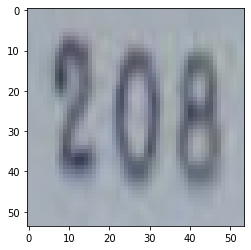

In [10]:
print('The shape of test set: {}'.format(x_test.shape))
print('The shape of label of training set: {}'.format(test_label.shape))
print('The shape of label length of training set: {} '.format(test_label_length.shape))
print('one image from test set:')
num = 1059
plt.imshow(x_test[num])
print('the label of that image is: {}'.format(y_test[num]))
print('the label showed in matrix is: \n{}'.format(test_label[num]))
print('the label length showed in matrix is: \n{}'.format(test_label_length[num]))

### 4 Get network structure from the Tensorboard

![img](img/tensorboard.png)

### 5 load the best model from meta file
* We trained multiple models, used data augmentation, and changed the network structure and number of parameters to optimize the results. 
* The result shown below is the best among these models

In [28]:
tf.reset_default_graph()
with tf.Session() as sess:
    saver=tf.train.import_meta_graph('modelbest/SVHNmodel_1575510762.meta')
    saver.restore(sess, tf.train.latest_checkpoint('modelbest/'))
    graph=tf.get_default_graph()
    tf_input1=graph.get_operations()[0].name+':0'
    tf_input2=graph.get_operations()[1].name+':0'
    tf_input3=graph.get_operations()[2].name+':0'
    tf_input4=graph.get_operations()[3].name+':0'
    
    L=graph.get_tensor_by_name("L/fc1/BiasAdd:0")
    S1=graph.get_tensor_by_name("S1/fc2/BiasAdd:0")
    S2=graph.get_tensor_by_name("S2/fc3/BiasAdd:0")
    S3=graph.get_tensor_by_name("S3/fc4/BiasAdd:0")
    S4=graph.get_tensor_by_name("S4/fc5/BiasAdd:0")
    S5=graph.get_tensor_by_name("S5/fc6/BiasAdd:0")
    print(tf_input1)
    print(tf_input2)
    print(tf_input3)
    print(tf_input4)
    print(L)
    print(S1)
    print(S2)
    print(S3)
    print(S4)
    print(S5)
    Ly, Sy1, Sy2, Sy3, Sy4, Sy5=sess.run([L, S1, S2, S3, S4, S5], feed_dict={tf_input1:x_test[0:6000], tf_input3:test_label_length[0:6000]})   

INFO:tensorflow:Restoring parameters from modelbest/SVHNmodel_1575510762
inputs/input_x:0
inputs/input_y:0
inputs/label_length:0
inputs/is_training:0
Tensor("L/fc1/BiasAdd:0", shape=(?, 7), dtype=float32)
Tensor("S1/fc2/BiasAdd:0", shape=(?, 11), dtype=float32)
Tensor("S2/fc3/BiasAdd:0", shape=(?, 11), dtype=float32)
Tensor("S3/fc4/BiasAdd:0", shape=(?, 11), dtype=float32)
Tensor("S4/fc5/BiasAdd:0", shape=(?, 11), dtype=float32)
Tensor("S5/fc6/BiasAdd:0", shape=(?, 11), dtype=float32)


In [29]:
predit_label = np.stack([Sy1, Sy2, Sy3, Sy4, Sy5], axis=1)

In [30]:
def matrix2num(matrix_label):
    digit = np.argmax(matrix_label, axis=2) # n x 5
    return digit

In [31]:
output_label = matrix2num(predit_label)
input_label = matrix2num(test_label)

### 6 calculate the accuracy on test set 

In [32]:
error_num = 0
for i in range(6000):
    e = np.count_nonzero(output_label[i] - input_label[i])
    if e != 0:
        error_num += 1

##### the test set is large, so devided into two subset to run the model

In [33]:
tf.reset_default_graph()
with tf.Session() as sess:
    saver=tf.train.import_meta_graph('modelbest/SVHNmodel_1575510762.meta')
    saver.restore(sess, tf.train.latest_checkpoint('modelbest/'))
    graph=tf.get_default_graph()
    tf_input1=graph.get_operations()[0].name+':0'
    tf_input2=graph.get_operations()[1].name+':0'
    tf_input3=graph.get_operations()[2].name+':0'
    tf_input4=graph.get_operations()[3].name+':0'
    
    L=graph.get_tensor_by_name("L/fc1/BiasAdd:0")
    S1=graph.get_tensor_by_name("S1/fc2/BiasAdd:0")
    S2=graph.get_tensor_by_name("S2/fc3/BiasAdd:0")
    S3=graph.get_tensor_by_name("S3/fc4/BiasAdd:0")
    S4=graph.get_tensor_by_name("S4/fc5/BiasAdd:0")
    S5=graph.get_tensor_by_name("S5/fc6/BiasAdd:0")
    Ly, Sy1, Sy2, Sy3, Sy4, Sy5=sess.run([L, S1, S2, S3, S4, S5], feed_dict={tf_input1:x_test[6000:12000], tf_input3:test_label_length[6000:12000]})   

INFO:tensorflow:Restoring parameters from modelbest/SVHNmodel_1575510762


In [34]:
predit_label = np.stack([Sy1, Sy2, Sy3, Sy4, Sy5], axis=1)
output_label = matrix2num(predit_label)
input_label = matrix2num(test_label)
for i in range(6000):
    e = np.count_nonzero(output_label[i] - input_label[6000+i])
    if e != 0:
        error_num += 1

### The final acc is:

In [35]:
valid_acc = 100 - (error_num * 100)/12000 #13067
print("The accuracy on test set is:{}%".format(valid_acc))

The accuracy on test set is:80.29166666666667%
